In [77]:
"""
Der Code sorgt dafür, dass Python keine Warnungen ausgibt, 
damit der Benutzer keine zusätzlichen Meldungen sieht, 
die möglicherweise nicht relevant sind.
"""
import warnings
warnings.filterwarnings('ignore')

In [78]:
"""
%matplotlib inline: Dieser Befehl bewirkt, 
dass Matplotlib-Grafiken direkt im Jupyter Notebook angezeigt werden, anstatt in einem separaten Fenster. 

"""
%matplotlib inline

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Daten Laden und erste Eindruck verschaffen

In [80]:
iris = pd.read_csv("iris_cleaned.csv")
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [81]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [82]:
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054533,3.758667,1.198667
std,0.828066,0.433205,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Axes: >

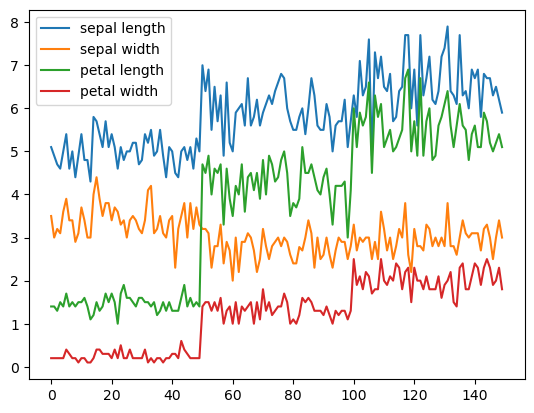

In [83]:
iris.plot()

array([[<Axes: title={'center': 'sepal length'}>,
        <Axes: title={'center': 'sepal width'}>],
       [<Axes: title={'center': 'petal length'}>,
        <Axes: title={'center': 'petal width'}>]], dtype=object)

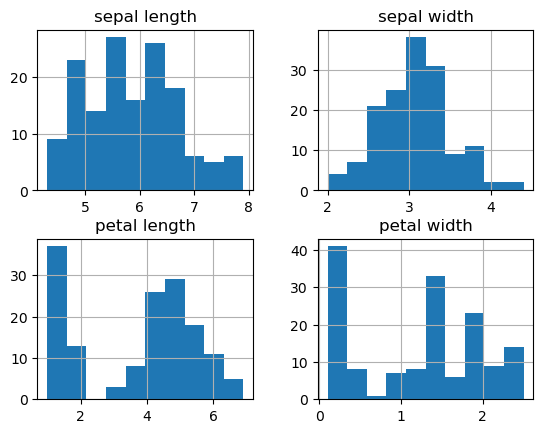

In [84]:
iris.hist()

In [85]:
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [86]:
iris["class"].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [87]:
categories = iris["class"]
category_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
numeric_values = categories.map(category_mapping)
numeric_values

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: class, Length: 150, dtype: int64

In [88]:
iris["y"] = numeric_values

In [89]:
iris.head()

,sepal length,sepal width,petal length,petal width,class,y
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [90]:
X = iris[["sepal length", "sepal width", "petal length", "petal width"]]
y = iris["y"]

In [91]:
X.shape, y.shape

((150, 4), (150,))

### Aufteilen der DAzen in Tranining und Test (60/40)

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42, stratify=y)

In [94]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((90, 4), (90,), (60, 4), (60,))

### Wir trainieren die Daten mit einem KNN Klassifikator 

In [95]:
from sklearn import neighbors

In [96]:
clf = neighbors.KNeighborsClassifier(1)

In [97]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Predict

In [72]:
clf.predict([[6.3, 2.7, 5.5, 1.5]])

array([2])

In [75]:
clf.score(X_train, y_train)

1.0

In [76]:
clf.score(X_test, y_test)

0.95

### Plotten

In [99]:
from matplotlib.colors import ListedColormap

In [101]:
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
font_size=25

def meshGrid(x_data, y_data):
    h = .02  # step size in the mesh
    x_min, x_max = x_data.min() - 1, x_data.max() + 1
    y_min, y_max = y_data.min() - 1, y_data.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return (xx,yy)
    
def plotPrediction(clf, x_data, y_data, x_label, y_label, colors, title="", mesh=True):
    xx,yy = meshGrid(x_data, y_data)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(20,10))
    if mesh:
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.scatter(x_data, y_data, c=colors, cmap=cmap_bold, s=80, marker='o')
    plt.xlabel(x_label, fontsize=font_size)
    plt.ylabel(y_label, fontsize=font_size)
    plt.title(title, fontsize=font_size)

### Zuerst nur Sepal Features 

In [113]:
X_train_sepal_only = X_train[["sepal length", "sepal width"]]
X_test_sepal_only = X_test[["sepal length", "sepal width"]]

In [114]:
clf_sepal = neighbors.KNeighborsClassifier(1)
clf_sepal.fit(X_train_sepal_only, y_train)

KNeighborsClassifier(n_neighbors=1)

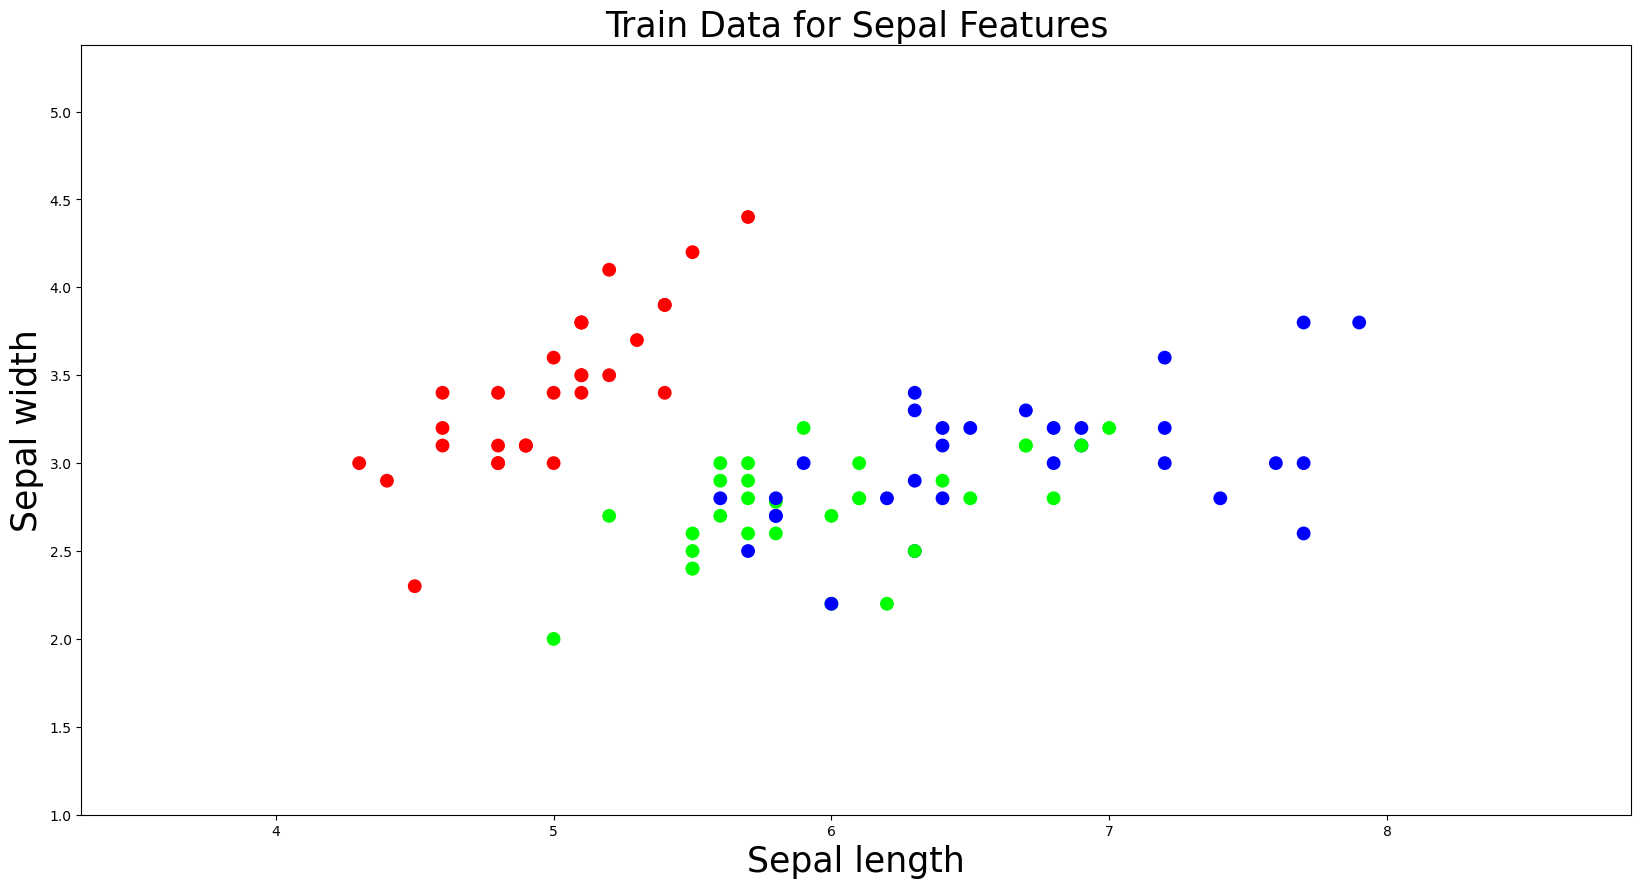

In [115]:
plotPrediction(clf_sepal, X_train_sepal_only["sepal length"], X_train_sepal_only["sepal width"], 
               'Sepal length', 'Sepal width', y_train, mesh=False,
                title="Train Data for Sepal Features")

### Scores sind gut für die Trainingsdaten, aber nicht so toll für Testdaten

In [116]:
clf_sepal.score(X_train_sepal_only, y_train)

0.9666666666666667

In [117]:
clf_sepal.score(X_test_sepal_only, y_test)

0.7833333333333333

### Das sieht nach Overfittung aus, das siehst du auch beim Plotting der Deciscion Boundaries

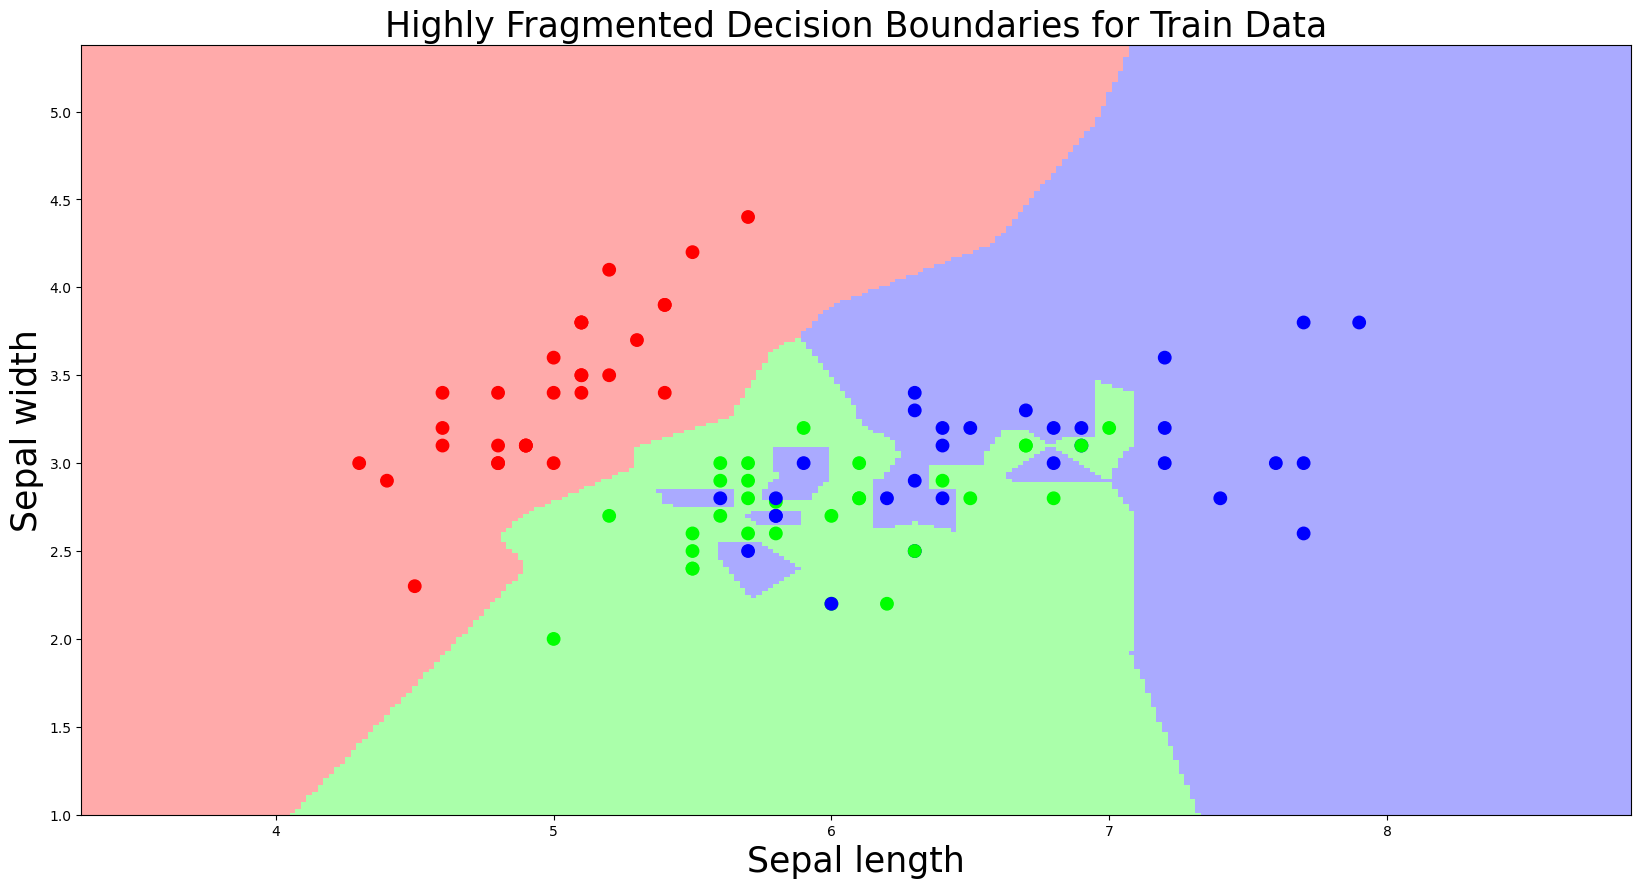

In [119]:
plotPrediction(clf_sepal, X_train_sepal_only["sepal length"], X_train_sepal_only["sepal width"], 
               'Sepal length', 'Sepal width', y_train, 
                title="Highly Fragmented Decision Boundaries for Train Data")

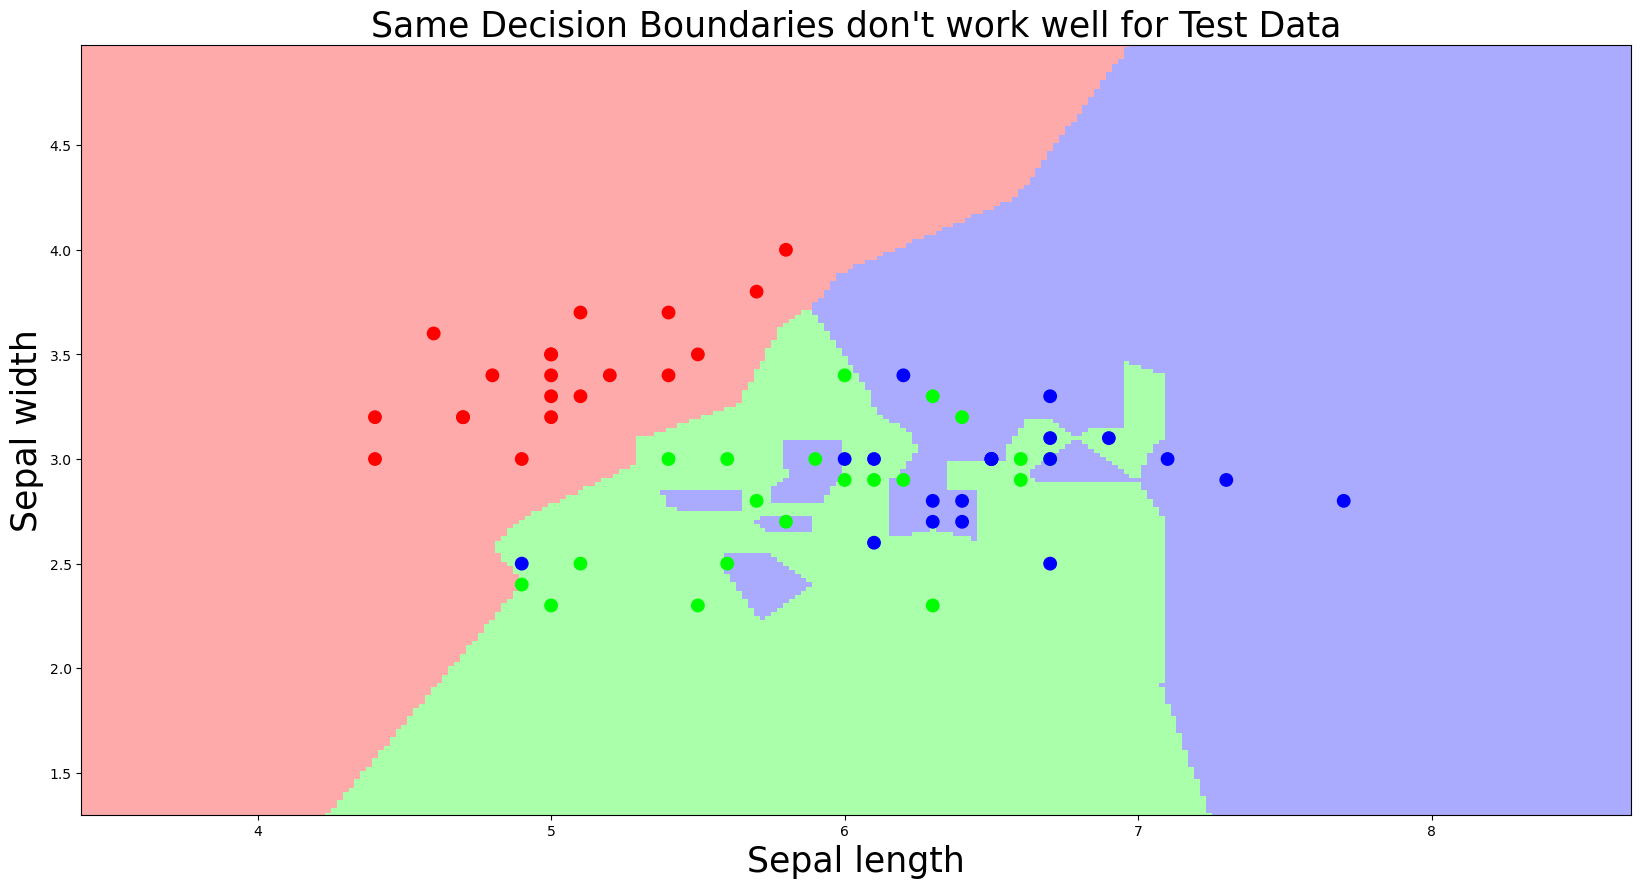

In [128]:
plotPrediction(clf_sepal, X_test_sepal_only["sepal length"], X_test_sepal_only["sepal width"], 
               'Sepal length', 'Sepal width', y_test, 
                title="Same Decision Boundaries don't work well for Test Data")

### Weniger Komplexer 

In [129]:
clf_sepal_10 = neighbors.KNeighborsClassifier(10)
clf_sepal_10.fit(X_train_sepal_only, y_train)

KNeighborsClassifier(n_neighbors=10)

In [130]:
clf_sepal_10.score(X_train_sepal_only, y_train)

0.8

In [131]:
clf_sepal_10.score(X_test_sepal_only, y_test)

0.7666666666666667

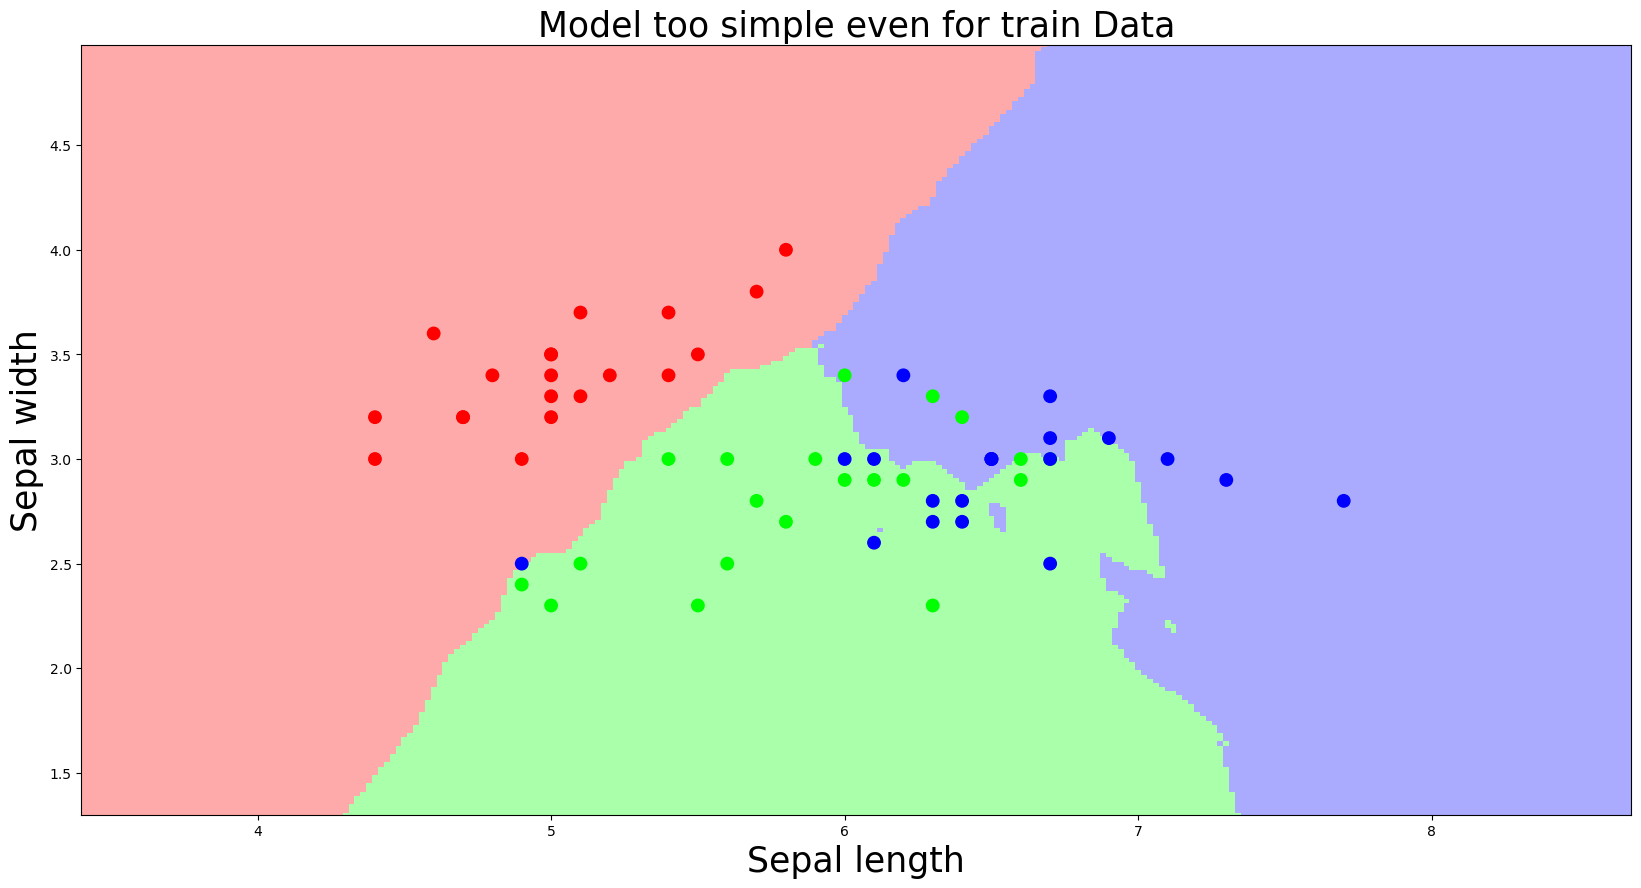

In [132]:
plotPrediction(clf_sepal_10, X_test_sepal_only["sepal length"], X_test_sepal_only["sepal width"], 
               'Sepal length', 'Sepal width', y_test, 
                title="Model too simple even for train Data")

Mit den Sepal Features werden wir immer entweder overfitten oder underfitten

### Wir versuchen es noch einmal mit den Petal Features

In [134]:
X_train_petal_only = X_train[["petal length", "petal width"]]
X_test_petal_only = X_test[["petal length", "petal width"]]

In [135]:
clf_petal_10 = neighbors.KNeighborsClassifier(10)
clf_petal_10.fit(X_train_petal_only, y_train)

KNeighborsClassifier(n_neighbors=10)

In [136]:
clf_petal_10.score(X_train_petal_only, y_train)

0.9666666666666667

In [137]:
clf_petal_10.score(X_test_petal_only, y_test)

0.95

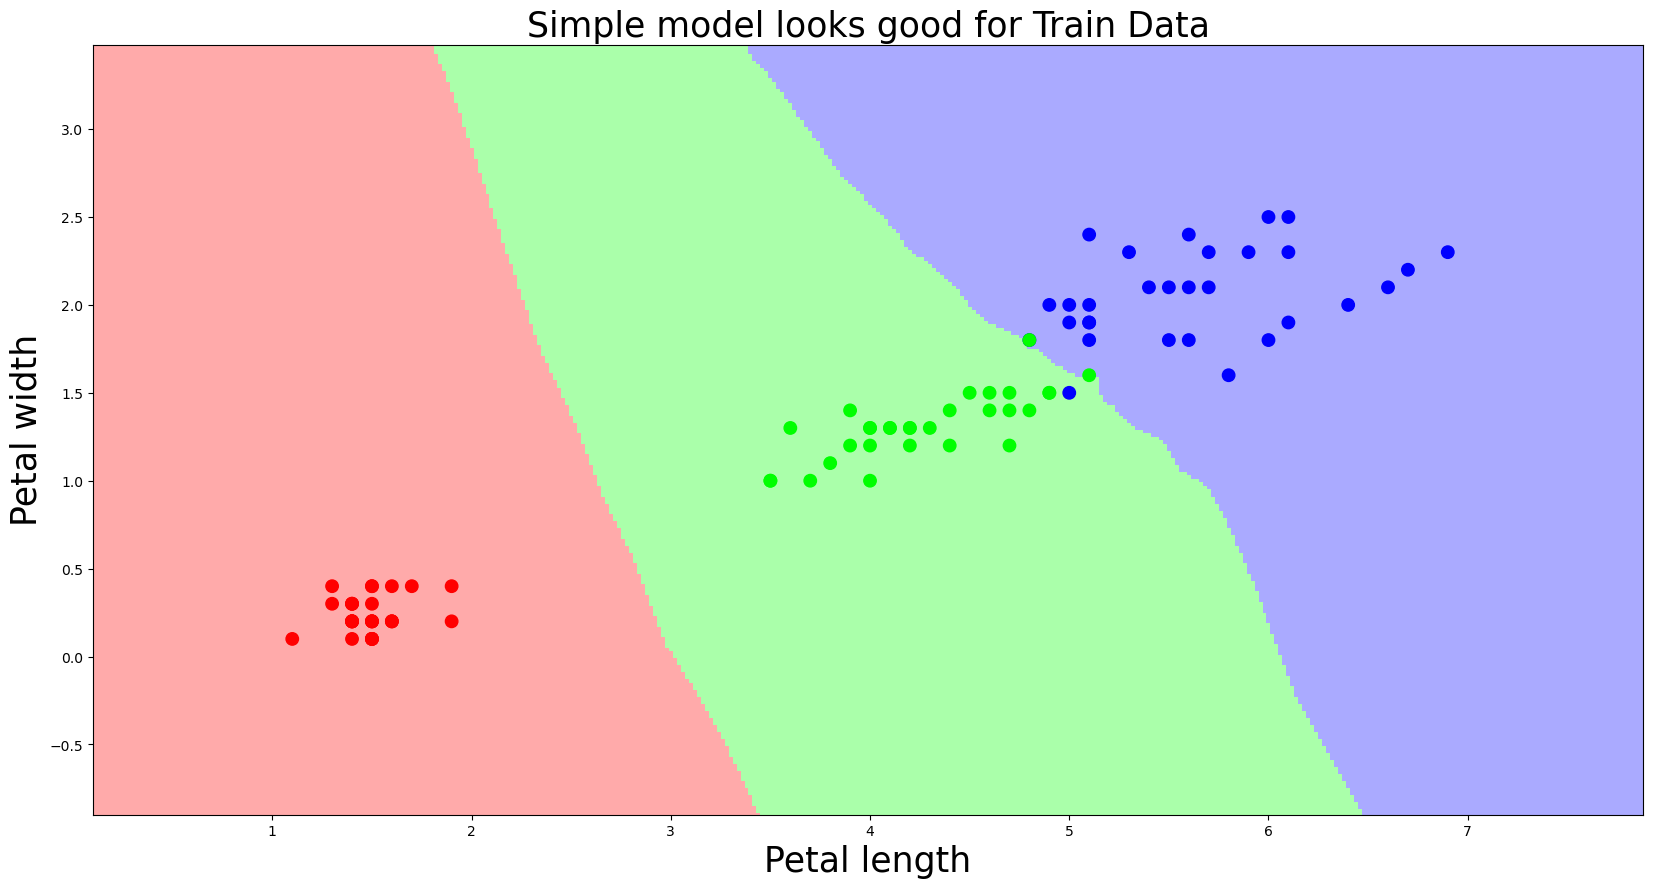

In [138]:
plotPrediction(clf_petal_10, X_train_petal_only["petal length"], X_train_petal_only["petal width"], 
               'Petal length', 'Petal width', y_train,
               title="Simple model looks good for Train Data")

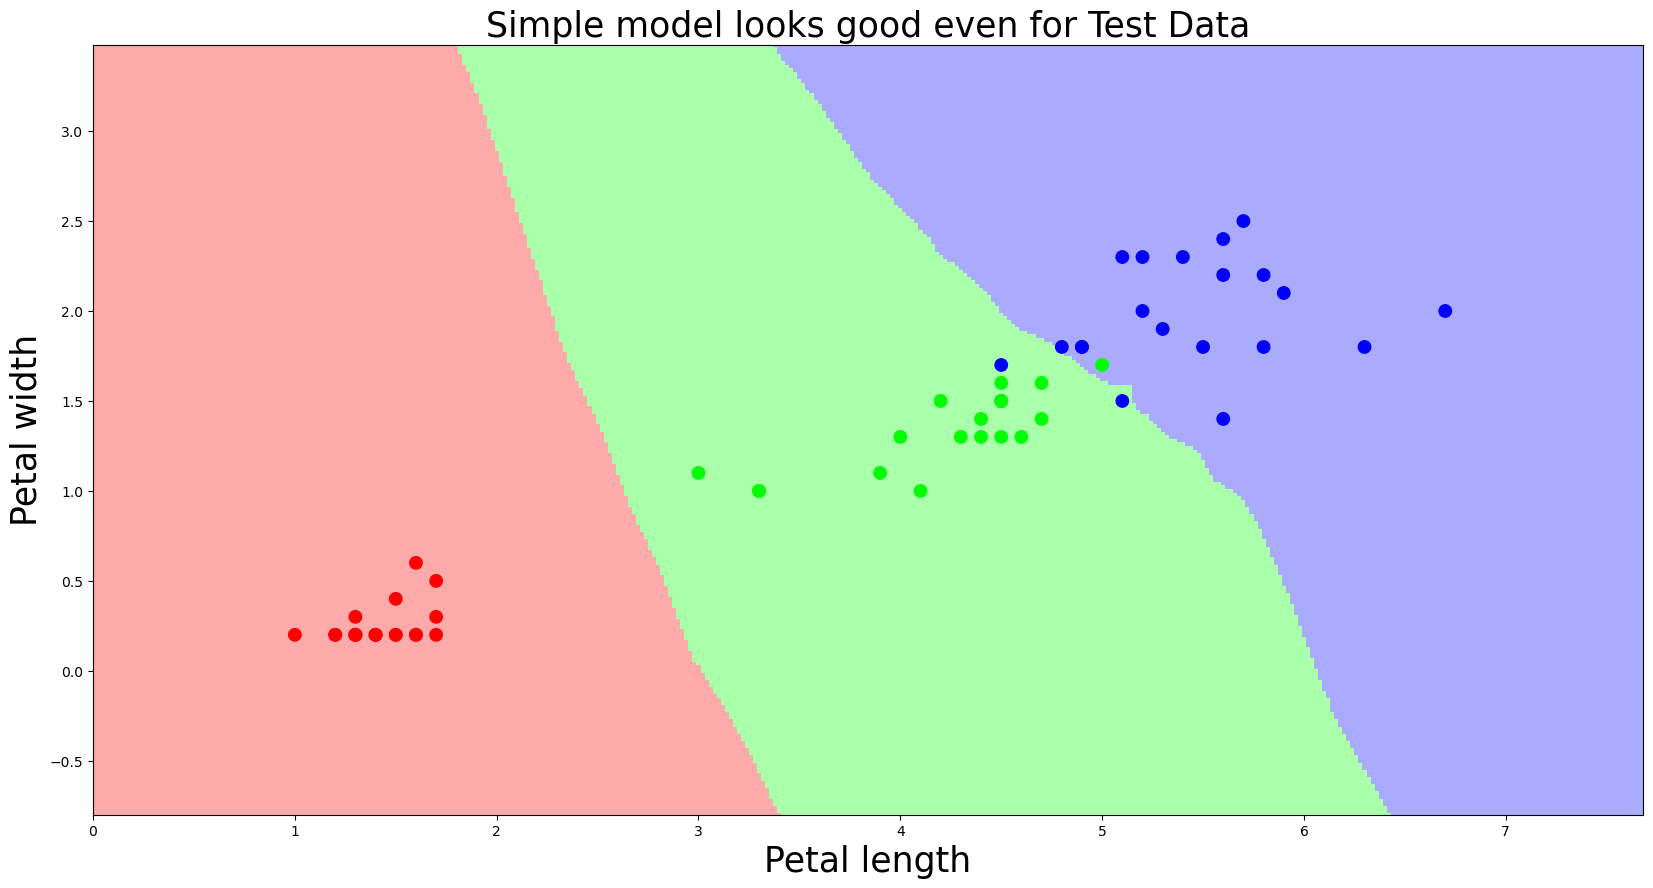

In [139]:
plotPrediction(clf_petal_10, X_test_petal_only["petal length"], X_test_petal_only["petal width"], 
               'Petal length', 'Petal width', y_test,
               title="Simple model looks good even for Test Data")